In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 16:04:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   276MB/s    in 0.2s    

2022-08-19 16:04:20 (276 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [10]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [11]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.376.jpg', 'cat.34.jpg', 'cat.533.jpg', 'cat.863.jpg', 'cat.104.jpg', 'cat.63.jpg', 'cat.815.jpg', 'cat.996.jpg', 'cat.430.jpg', 'cat.656.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


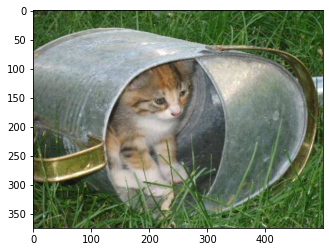

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


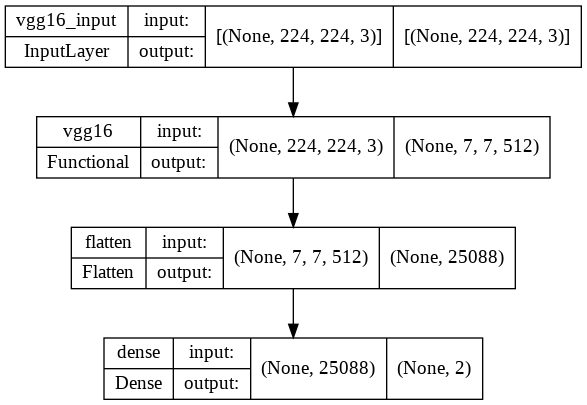

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 1503s 15s/step - loss: 0.4688 - acc: 0.7835 - val_loss: 0.3408 - val_acc: 0.8640
Epoch 2/10
100/100 [==============================] - 1503s 15s/step - loss: 0.2776 - acc: 0.9010 - val_loss: 0.2812 - val_acc: 0.8860
Epoch 3/10
 58/100 [================>.............] - ETA: 7:07 - loss: 0.2187 - acc: 0.9371

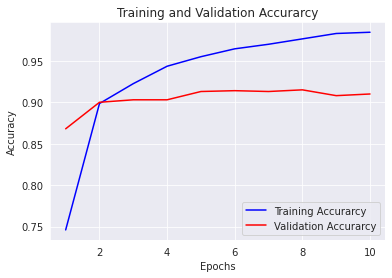

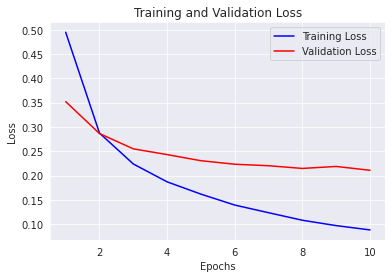

In [ ]:
 import seaborn as sns
 #Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
print('Accuracy Score = ',np.max(history.history['val_acc']))

Accuracy Score =  0.9150000214576721


ResNet50

In [ ]:
from keras.applications.resnet import ResNet50
base_model2 = ResNet50(input_shape=(512,512,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


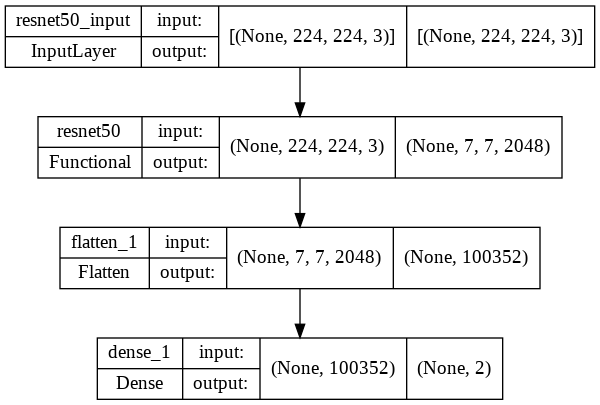

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model2.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 15s 148ms/step - loss: 0.5550 - acc: 0.7045 - val_loss: 0.6517 - val_acc: 0.6290
Epoch 2/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5525 - acc: 0.7175 - val_loss: 0.5892 - val_acc: 0.6850
Epoch 3/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5431 - acc: 0.7100 - val_loss: 0.5840 - val_acc: 0.6910
Epoch 4/10
100/100 [==============================] - 13s 130ms/step - loss: 0.5202 - acc: 0.7310 - val_loss: 0.5820 - val_acc: 0.6930
Epoch 5/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5183 - acc: 0.7295 - val_loss: 0.5921 - val_acc: 0.6970
Epoch 6/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5121 - acc: 0.7435 - val_loss: 0.5791 - val_acc: 0.6960
Epoch 7/10
100/100 [==============================] - 13s 131ms/step - loss: 0.4938 - acc: 0.7550 - val_loss: 0.5763 - val_acc: 0.7020
Epoch 8/10
100/100 [==============================] - 1

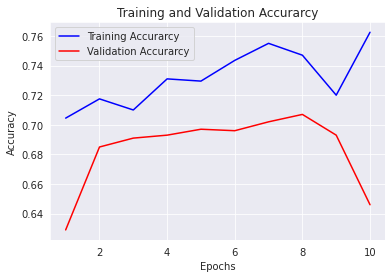

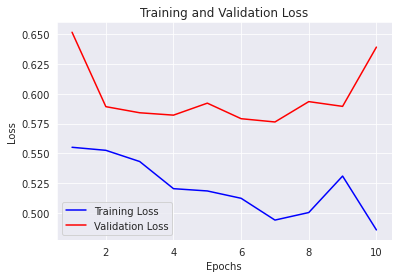

In [ ]:
 import seaborn as sns
 #Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

*MobilenNetV2*

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model3 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


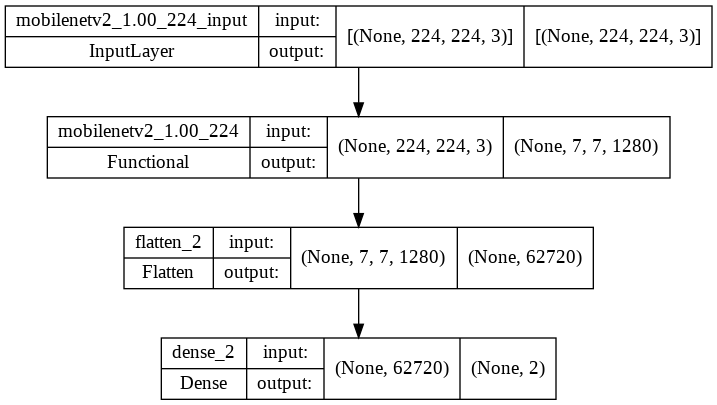

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model3.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 118ms/step - loss: 0.1514 - acc: 0.9530 - val_loss: 0.0884 - val_acc: 0.9750
Epoch 2/10
100/100 [==============================] - 11s 112ms/step - loss: 0.0143 - acc: 0.9950 - val_loss: 0.0785 - val_acc: 0.9800
Epoch 3/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0744 - val_acc: 0.9800
Epoch 4/10
100/100 [==============================] - 11s 111ms/step - loss: 5.9486e-04 - acc: 1.0000 - val_loss: 0.0755 - val_acc: 0.9790
Epoch 5/10
100/100 [==============================] - 11s 111ms/step - loss: 4.5742e-04 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9800
Epoch 6/10
100/100 [==============================] - 12s 118ms/step - loss: 3.7919e-04 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9790
Epoch 7/10
100/100 [==============================] - 12s 118ms/step - loss: 3.1663e-04 - acc: 1.0000 - val_loss: 0.0781 - val_acc: 0.9780
Epoch 8/10
100/100 [===================

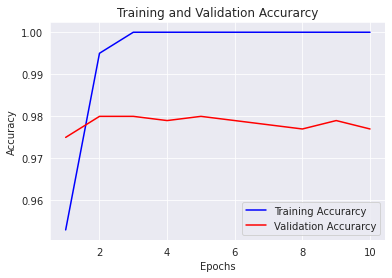

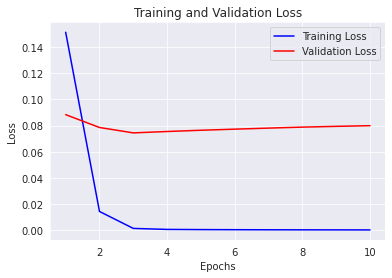

In [ ]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

EfficientNetB0

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
base_model4 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
import tensorflow as tf
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


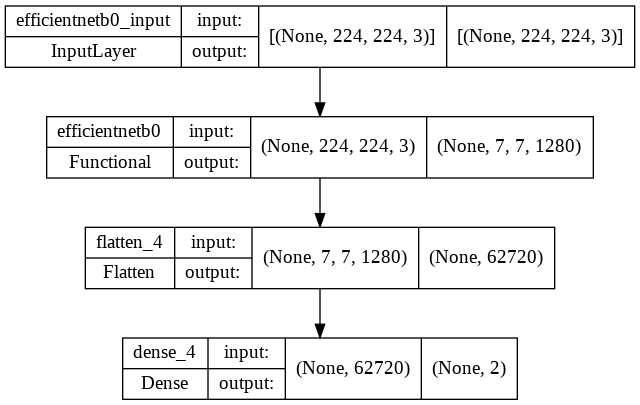

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model4.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 11s 114ms/step - loss: 0.7747 - acc: 0.5075 - val_loss: 0.7180 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7546 - acc: 0.4920 - val_loss: 0.7475 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7457 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 12s 116ms/step - loss: 0.7438 - acc: 0.4855 - val_loss: 0.7137 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7522 - acc: 0.5025 - val_loss: 0.7014 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 12s 122ms/step - loss: 0.7289 - acc: 0.5245 - val_loss: 0.7052 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7575 - acc: 0.4985 - val_loss: 0.7395 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 1

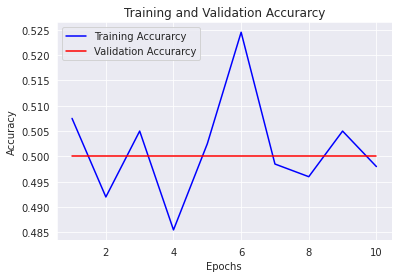

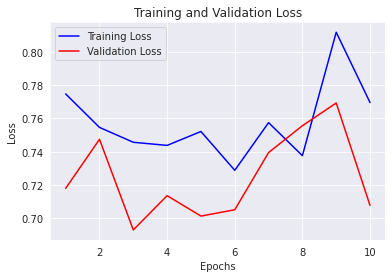

In [ ]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

GoogleNet

In [1]:
from keras.applications.inception_v3 import InceptionV3
base_model5 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [2]:
import tensorflow as tf
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


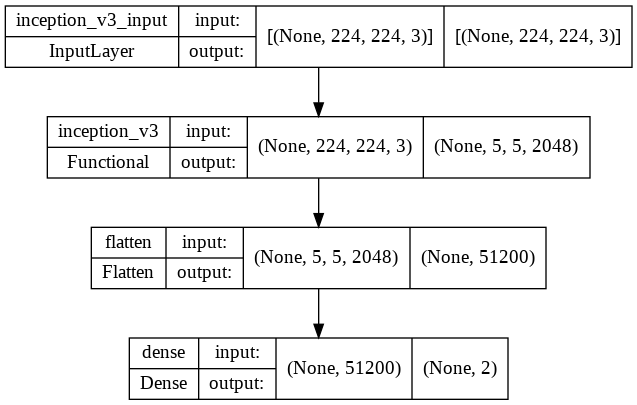

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model5,  show_shapes=True, show_layer_names=True)

In [13]:
history = model5.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 27s 127ms/step - loss: 0.1672 - acc: 0.9490 - val_loss: 0.0530 - val_acc: 0.9810
Epoch 2/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0283 - acc: 0.9920 - val_loss: 0.0341 - val_acc: 0.9900
Epoch 3/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0035 - acc: 0.9995 - val_loss: 0.0349 - val_acc: 0.9880
Epoch 4/10
100/100 [==============================] - 11s 113ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 0.9880
Epoch 5/10
100/100 [==============================] - 11s 113ms/step - loss: 8.9095e-04 - acc: 1.0000 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 6/10
100/100 [==============================] - 11s 113ms/step - loss: 6.8501e-04 - acc: 1.0000 - val_loss: 0.0348 - val_acc: 0.9880
Epoch 7/10
100/100 [==============================] - 11s 113ms/step - loss: 5.9285e-04 - acc: 1.0000 - val_loss: 0.0351 - val_acc: 0.9900
Epoch 8/10
100/100 [=======================

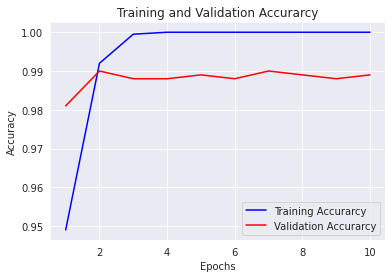

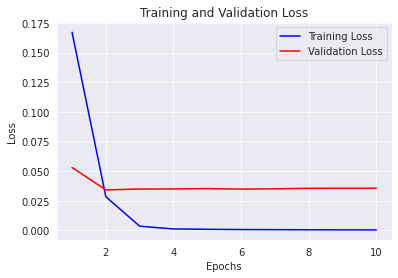

In [15]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

HORSES AND ZEBRA DATASET

In [25]:
# importing the data
if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:01<00:00, 62.2MB/s]


In [29]:
from PIL import Image
# extracting the training images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

# sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

# saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [30]:
# extracting the testing images
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

# sorting the filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

# saving all the images in the appropriate directories
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
base_dir = '/content/horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')


train_horses_dir = os.path.join(train_dir, 'A')


train_zebras_dir = os.path.join(train_dir, 'B')


validation_horses_dir = os.path.join(validation_dir, 'A')


validation_zebras_dir = os.path.join(validation_dir, 'B')

In [33]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [34]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [35]:
train_horses_fnames = os.listdir(train_horses_dir)
print(train_horses_fnames[:10])

train_zebras_fnames = os.listdir(train_zebras_dir)
train_zebras_fnames.sort()
print(train_zebras_fnames[:10])

['n02381460_4429.jpg', 'n02381460_855.jpg', 'n02381460_1349.jpg', 'n02381460_2179.jpg', 'n02381460_7634.jpg', 'n02381460_2411.jpg', 'n02381460_4501.jpg', 'n02381460_4758.jpg', 'n02381460_2985.jpg', 'n02381460_3875.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


VGG16

In [70]:
from keras.applications.vgg16 import VGG16
base_model6 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model6.trainable = False #freeze the layers
base_model6.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [71]:
import tensorflow as tf
model6 = tf.keras.Sequential([
    base_model6,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model6.summary()

model6.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [72]:
history = model6.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 131ms/step - loss: 0.3357 - acc: 0.8652 - val_loss: 0.1959 - val_acc: 0.9300
Epoch 2/10
100/100 [==============================] - 13s 129ms/step - loss: 0.1653 - acc: 0.9495 - val_loss: 0.1453 - val_acc: 0.9650
Epoch 3/10
100/100 [==============================] - 13s 130ms/step - loss: 0.1298 - acc: 0.9566 - val_loss: 0.1967 - val_acc: 0.9250
Epoch 4/10
100/100 [==============================] - 13s 132ms/step - loss: 0.1089 - acc: 0.9672 - val_loss: 0.1227 - val_acc: 0.9450
Epoch 5/10
100/100 [==============================] - 13s 134ms/step - loss: 0.0902 - acc: 0.9727 - val_loss: 0.1245 - val_acc: 0.9550
Epoch 6/10
100/100 [==============================] - 14s 135ms/step - loss: 0.0808 - acc: 0.9798 - val_loss: 0.1148 - val_acc: 0.9650
Epoch 7/10
100/100 [==============================] - 14s 134ms/step - loss: 0.0742 - acc: 0.9808 - val_loss: 0.1091 - val_acc: 0.9600
Epoch 8/10
100/100 [==============================] - 1

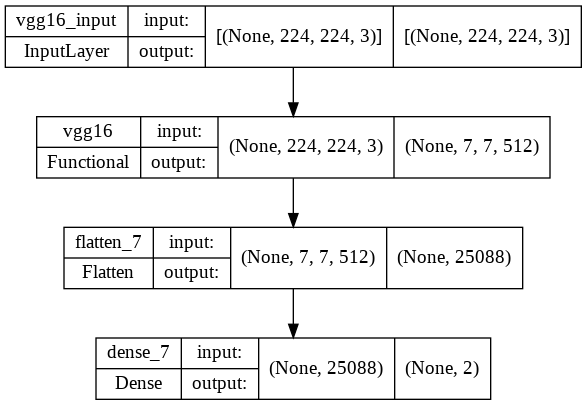

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model6,  show_shapes=True, show_layer_names=True)

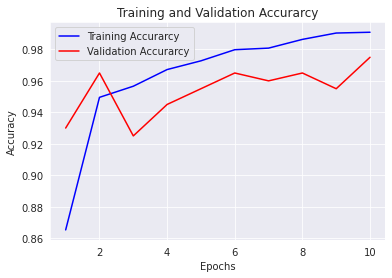

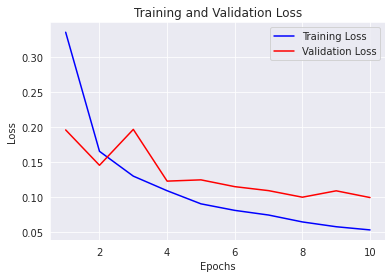

In [74]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

MOBILENETV2

In [75]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model7 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model7.trainable = False #freeze the layers
base_model7.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [76]:
import tensorflow as tf
model7 = tf.keras.Sequential([
    base_model7,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model7.summary()

model7.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [77]:
history = model7.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,validation_steps=10,verbose=1)

Epoch 1/10
100/100 [==============================] - 9s 73ms/step - loss: 0.0864 - acc: 0.9672 - val_loss: 0.1087 - val_acc: 0.9750
Epoch 2/10
100/100 [==============================] - 6s 65ms/step - loss: 0.0140 - acc: 0.9939 - val_loss: 0.0746 - val_acc: 0.9850
Epoch 3/10
100/100 [==============================] - 7s 65ms/step - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0707 - val_acc: 0.9900
Epoch 4/10
100/100 [==============================] - 7s 74ms/step - loss: 6.0889e-04 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9800
Epoch 5/10
100/100 [==============================] - 6s 64ms/step - loss: 3.3355e-04 - acc: 1.0000 - val_loss: 0.0546 - val_acc: 0.9850
Epoch 6/10
100/100 [==============================] - 6s 65ms/step - loss: 2.0121e-04 - acc: 1.0000 - val_loss: 0.0991 - val_acc: 0.9800
Epoch 7/10
100/100 [==============================] - 6s 64ms/step - loss: 1.4694e-04 - acc: 1.0000 - val_loss: 0.0717 - val_acc: 0.9850
Epoch 8/10
100/100 [==============================] -

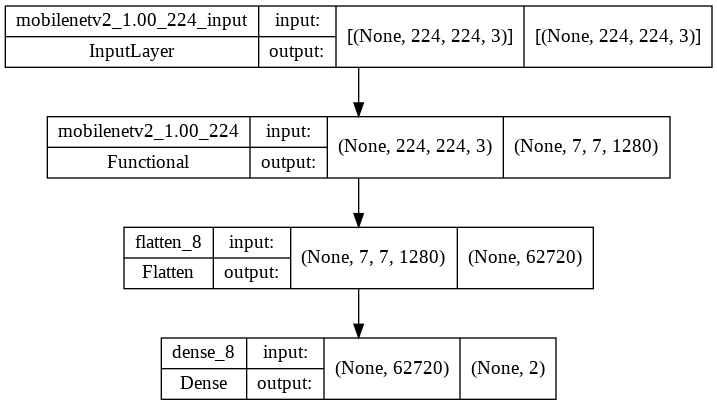

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(model7,  show_shapes=True, show_layer_names=True)

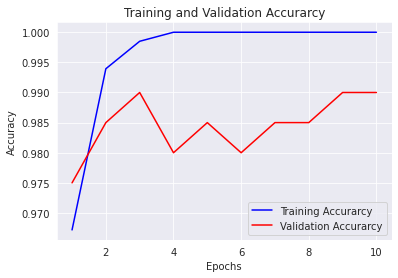

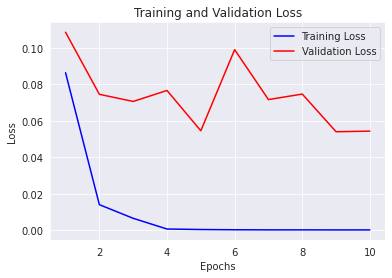

In [79]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

EFFICIENTNET

In [51]:
from keras.applications.efficientnet import EfficientNetB0
base_model8 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model8.trainable = False #freeze the layers
base_model8.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [52]:
import tensorflow as tf
model8 = tf.keras.Sequential([
    base_model8,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model8.summary()

model8.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [54]:
history = model8.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 8s 77ms/step - loss: 0.7058 - acc: 0.5639 - val_loss: 0.6462 - val_acc: 0.5550
Epoch 2/10
100/100 [==============================] - 7s 69ms/step - loss: 0.7205 - acc: 0.5578 - val_loss: 0.7665 - val_acc: 0.4450
Epoch 3/10
100/100 [==============================] - 8s 80ms/step - loss: 0.6907 - acc: 0.5674 - val_loss: 0.6487 - val_acc: 0.6500
Epoch 4/10
100/100 [==============================] - 7s 71ms/step - loss: 0.6861 - acc: 0.5765 - val_loss: 0.6477 - val_acc: 0.5250
Epoch 5/10
100/100 [==============================] - 7s 70ms/step - loss: 0.6837 - acc: 0.5745 - val_loss: 0.6499 - val_acc: 0.6900
Epoch 6/10
100/100 [==============================] - 7s 70ms/step - loss: 0.6676 - acc: 0.5955 - val_loss: 0.6962 - val_acc: 0.4900
Epoch 7/10
100/100 [==============================] - 7s 69ms/step - loss: 0.6856 - acc: 0.5709 - val_loss: 0.6437 - val_acc: 0.7850
Epoch 8/10
100/100 [==============================] - 7s 69ms/step - 

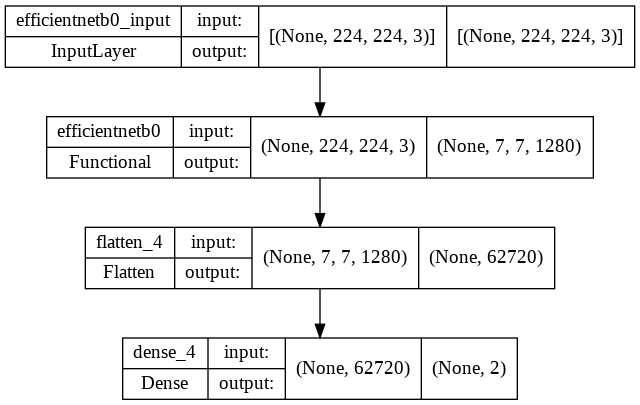

In [65]:
from tensorflow.keras.utils import plot_model
plot_model(model8,  show_shapes=True, show_layer_names=True)

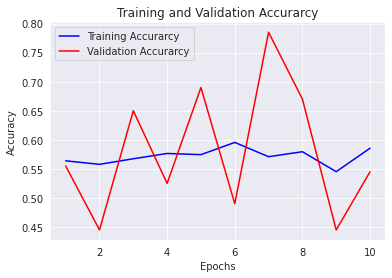

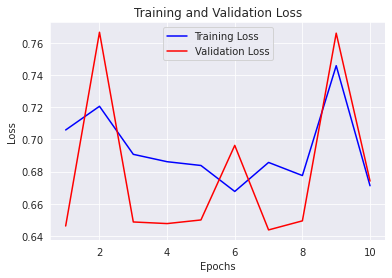

In [55]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

GoogleNet

In [60]:
from keras.applications.inception_v3 import InceptionV3
base_model9= InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model9.trainable = False #freeze the layers
base_model9.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [61]:
import tensorflow as tf
model9 = tf.keras.Sequential([
    base_model9,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model9.summary()

model9.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [62]:
history = model9.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 15s 85ms/step - loss: 0.0754 - acc: 0.9715 - val_loss: 0.0546 - val_acc: 0.9800
Epoch 2/10
100/100 [==============================] - 9s 89ms/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.1010 - val_acc: 0.9850
Epoch 3/10
100/100 [==============================] - 7s 72ms/step - loss: 0.0056 - acc: 0.9990 - val_loss: 0.0991 - val_acc: 0.9850
Epoch 4/10
100/100 [==============================] - 7s 73ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1107 - val_acc: 0.9800
Epoch 5/10
100/100 [==============================] - 7s 73ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.1163 - val_acc: 0.9800
Epoch 6/10
100/100 [==============================] - 7s 73ms/step - loss: 5.3604e-04 - acc: 1.0000 - val_loss: 0.0556 - val_acc: 0.9850
Epoch 7/10
100/100 [==============================] - 7s 72ms/step - loss: 3.9792e-04 - acc: 1.0000 - val_loss: 0.0306 - val_acc: 0.9900
Epoch 8/10
100/100 [==============================] - 7s 73m

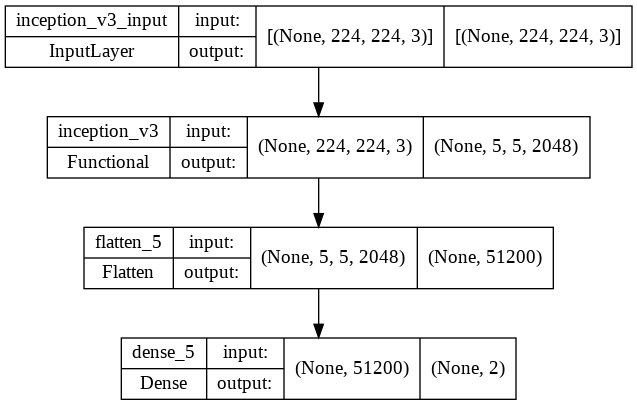

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model9,  show_shapes=True, show_layer_names=True)

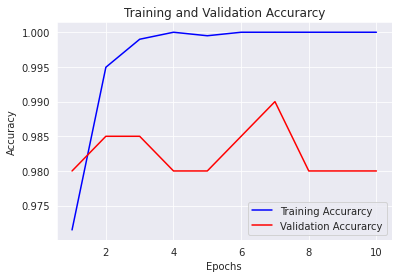

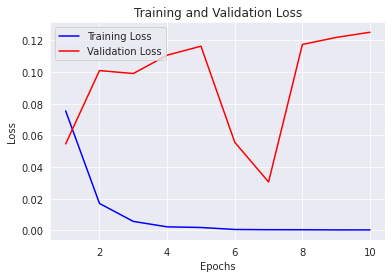

In [63]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()